# Diluted Unitary Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [32]:
def optimize_annulus_distance(spectrum_target, 
                              d, 
                              rank_start, 
                              rank_step): 
    
    model_list = []
    distance_list = []
    counter = 0
    for rank in tqdm(range(rank_start, d**2+rank_step, rank_step)): 
        model = ModelQuantumMap(channel = DilutedKrausMap(U=generate_haar_random(d, rng=rng), 
                                                          c=0.5, 
                                                          kraus_part=KrausMap(d, 
                                                                              rank=rank, 
                                                                              trainable=False),
                                                     ),
                            loss_function = AnnulusDistance(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                            logger = Logger(loss_function = AnnulusDistance(), 
                                            verbose=True,),
                            )
        model.train(inputs = None,
                    targets = [spectrum_target],
                    num_iter = 500,
                    
                   )

        model_list.append(model)
        distance_list.append(model.logger.loss_train_list[-1])
        if counter > 1:
            if distance_list[-1]>distance_list[-2]:
                break
        counter += 1

    distance_best = distance_list[-2]
    model_best = model_list[-2]

    return distance_best, model_best

def fit_diluted_unitary(spectrum_target_list, 
                        d, 
                        rank_start, 
                        rank_step):
    distance_best_list = []
    model_best_list = []
    for spectrum_target in spectrum_target_list:
        U = generate_haar_random(d, rng) 
        distance_best, model_best = optimize_annulus_distance(spectrum_target,
                                                              d,
                                                              rank_start,
                                                              rank_step)
        distance_best_list.append(distance_best)
        model_best_list.append(model_best)
    
    for model in model_best_list:
        model.optimizer = None
        
    return distance_best_list, model_best_list

## Three Qubits

In [11]:
[channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7] = loader(data_path("channel_fullRank_belem_longTrain.p"))

spectrum_target_list1 = [channel_spectrum(channel) for channel in channel_list1]
spectrum_target_list2 = [channel_spectrum(channel) for channel in channel_list2]
spectrum_target_list3 = [channel_spectrum(channel) for channel in channel_list3]
spectrum_target_list4 = [channel_spectrum(channel) for channel in channel_list4]
spectrum_target_list5 = [channel_spectrum(channel) for channel in channel_list5]
spectrum_target_list6 = [channel_spectrum(channel) for channel in channel_list6]
spectrum_target_list7 = [channel_spectrum(channel) for channel in channel_list7]

In [17]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list1, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_8layer.model"))

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.3002943596574898 None
0.040560369317981265 None
0.037912927088753406 None
0.037933704358339586 None
0.03802588677035293 None
0.038196805980784176 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2406746418889724 None
0.030224481180936125 None
0.028794154962653275 None
0.012493627588726255 None
0.02874776094336611 None
0.028922384046869986 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2315391068405059 None
0.008601862596246151 None
0.008399710561128333 None
0.008314020054981098 None
0.00829898310020253 None
0.00822467755849699 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23847344810058868 None
0.00498463042607424 None
0.0040509917227457524 None
0.004154428788926045 None
0.004355013625427927 None
0.004305388712065868 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21833115820002652 None
0.003201809225914055 None
0.0029471301170417297 None
0.00280439823721166 None
0.002806379798984046 None
0.003178066183602408 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.21515369682129687 None
0.004301718365531804 None
0.003605811942507256 None
0.003874708663452467 None
0.0038741819940654614 None
0.003516260246212685 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.314802205603589 None
0.081354825853202 None
0.07802595587687756 None
0.046214910577639205 None
0.0780346435975999 None
0.07786524424350182 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2978074675005951 None
0.02979804013736046 None
0.02486673349689649 None
0.024698345367086146 None
0.02506506214729347 None
0.024726536023873827 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.28337846820494655 None
0.03171629871743008 None
0.009897190564028144 None
0.04154257060346705 None
0.009848529292290829 None
0.026177642115311955 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.27206692363914714 None
0.03146298738319196 None
0.027980874709552184 None
0.027753989883334072 None
0.02840747308087887 None
0.02805628130467772 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.27018666096190347 None
0.01955915151371575 None
0.014382649723722916 None
0.014412988103321409 None
0.01447622705140058 None
0.01450934987528365 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2617656017280561 None
0.013667749959447101 None
0.009328258780187485 None
0.00942974281582129 None
0.00922502385437147 None
0.009402383603523315 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.244948903983638 None
0.013728946511477652 None
0.024377659037734478 None
0.02425004492182682 None
0.02471973324674491 None
0.024609423435658414 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.305202660755935 None
0.032978909676747936 None
0.028646557825220752 None
0.028613516449419184 None
0.028315399566916817 None
0.02851351115503551 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24233900132273195 None
0.012080689841270545 None
0.008626535750134261 None
0.008529645748340746 None
0.008462183379258536 None
0.008709615500390979 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24358724555485267 None
0.015604236141237966 None
0.011025715304142607 None
0.010932655159278458 None
0.010951184825329117 None
0.011159912505180693 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.3329613510914506 None
0.023726971082660406 None
0.01960613307413777 None
0.018993637596211123 None
0.019027586106556558 None
0.019331589305102842 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.25458124987849823 None
0.015819100206402353 None
0.010642582555281083 None
0.010717044833767207 None
0.010393243038228158 None
0.010389489738791094 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2525985990165968 None
0.014095640061073488 None
0.008417626841494453 None
0.008414372953214122 None
0.008346040828537238 None
0.008164523225139747 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.26573468814837664 None
0.01605361969819004 None
0.010028102585028573 None
0.010578647323670776 None
0.010011332059086775 None
0.01008370558756734 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.3147359438773378 None
0.0475096957489355 None
0.027095837462078467 None
0.02692140270323477 None
0.02699575274329375 None
0.02727754095258304 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.28346988842238413 None
0.036390134643152945 None
0.0487599587684443 None
0.04856085663746977 None
0.04849645778487649 None
0.04851131139587763 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23377288675106558 None
0.009712962644844721 None
0.006845048815381025 None
0.006717410661069998 None
0.007045395386967154 None
0.006658432115756112 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2464404766149771 None
0.008936314145557706 None
0.0057429541114884936 None
0.005619830152817529 None
0.005426739479671556 None
0.005459802264169308 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.22281648294121134 None
0.007213167107926332 None
0.005123451058203476 None
0.004783262092376521 None
0.005011591140179706 None
0.021322485531972288 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.3671352686892048 None
0.03250412132696981 None
0.03191985032128458 None
0.031634583984822384 None
0.031680746061656856 None
0.03144311867210417 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.28513401860790566 None
0.016197187202929834 None
0.013736567466617187 None
0.013777187798762486 None
0.013696645479488602 None
0.013895577245177837 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.24991164570814273 None
0.01709229476891437 None
0.01119999208419336 None
0.011642673469194731 None
0.01136875858618382 None
0.011281348992712107 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2418249713576759 None
0.011209792119333505 None
0.006127660998288726 None
0.005817394118015775 None
0.005870443516622217 None
0.0061570206615721 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23446803698372115 None
0.007197345389720658 None
0.0024419650118646186 None
0.0028453031574817863 None
0.002380966496952433 None
0.0023984424630981186 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2509808548671888 None
0.013345146835264669 None
0.008728355196608488 None
0.008501444464226812 None
0.00837377766892165 None
0.009067277563162432 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.302695937082018 None
0.0579167215257136 None
0.07016325074685702 None
0.06994352683957161 None
0.053445958621623255 None
0.07030592669168112 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.25189021700652636 None
0.03520215137536015 None
0.029612440984301477 None
0.02966120867047566 None
0.013532252427781765 None
0.013554272333235674 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2441111793801759 None
0.013285531190744368 None
0.007981037595782739 None
0.008329009938476708 None
0.008200359079312911 None
0.008192172721752582 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2530455321976086 None
0.01142457172693839 None
0.007281829655042712 None
0.007212141294635256 None
0.0072760123179417885 None
0.007111424526892492 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2505860490933305 None
0.00882145353771542 None
0.0034953405221128213 None
0.0028552433364108527 None
0.0032534811738546875 None
0.002815628476312243 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23173262282415324 None
0.008946044739715229 None
0.003645109485929074 None
0.004532329819355866 None
0.0037236586841141533 None
0.004294215175130038 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.3415112346657507 None
0.03735864292859313 None
0.033004146828381646 None
0.033101158274806794 None
0.032979047049436834 None
0.03289938919145978 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2750165051182292 None
0.014534890718007168 None
0.009044685219862991 None
0.009206448014534938 None
0.009341471294163904 None
0.009319710756334242 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2616816890502741 None
0.011681133048287827 None
0.00566155175229075 None
0.005736586801906438 None
0.00601726088884198 None
0.005693858905538201 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.23533750004723625 None
0.010339166453831974 None
0.0057577344031891405 None
0.005738150271073843 None
0.005745302928948792 None
0.005854618630784121 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.2845574103322498 None
0.038096648822210824 None
0.018648919493430144 None
0.019008355097992893 None
0.018971563988654 None
0.03493556230658215 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.2710507582289984 None
0.02060055763368648 None
0.01611533896349885 None
0.016012444236351276 None
0.015923333030137807 None
0.016121381793341407 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.26372661689918564 None
0.010695261644886076 None
0.006700518306375867 None
0.006771080088341926 None
0.006522310591704096 None
0.006562258724185808 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.25118957174469186 None
0.013733523951998592 None
0.00900729763741274 None
0.009224465842569847 None
0.009104918750248762 None
0.00863099900811154 None


NameError: name 'distance_best_list1' is not defined

In [24]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list2, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_16layer.model"))

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.1614203280277904 None
0.14329846379146166 None
0.1587352459065628 None
0.1587352458983767 None
0.14329831337410723 None
0.15873524590127985 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04590504077770768 None
0.03876638874771545 None
0.05500250332416704 None
0.05479314810583168 None
0.0389612616947123 None
0.03843256467986893 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04195493031230242 None
0.019651403303850498 None
0.019553775596476607 None
0.03491088924681898 None
0.035045846519967824 None
0.035093429690506814 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04888927157238516 None
0.03281319794935809 None
0.017429157367327128 None
0.03277599669823625 None
0.017707303725929702 None
0.017384918419605093 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.028746981671822994 None
0.012423039665453686 None
0.01251753754150146 None
0.011774486175277883 None
0.012430857390267273 None
0.01254570477342763 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.02556952029309335 None
0.013057677407063702 None
0.013323209299417958 None
0.01305671640103706 None
0.013598041379621463 None
0.013020137680379441 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.2071157931740757 None
0.1908524372290335 None
0.20628632332934538 None
0.19085242623497603 None
0.19085242600717262 None
0.20628695050697726 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.06266553539398236 None
0.03539032351952758 None
0.034684884443232575 None
0.05019635618391942 None
0.0501185108956253 None
0.034891681749022865 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.05113910016570275 None
0.05112885084760025 None
0.0356305630131112 None
0.051538419393535526 None
0.05112937256987529 None
0.03589341850759187 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.15354343591917186 None
0.16469258998887606 None
0.1646924681635331 None
0.14924749654840147 None
0.14924749656958086 None
0.1492474965884256 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.06104139711215168 None
0.05371536180969427 None
0.05394930534602576 None
0.05409900867803678 None
0.06918746273733609 None
0.08364140088957485 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.06271219698804614 None
0.05092508733935187 None
0.06533058419857518 None
0.05033088751530333 None
0.06502975201773861 None
0.034928881230004066 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03180451434139548 None
0.022924971534979473 None
0.023440136852815978 None
0.022928134023163536 None
0.023453097497376015 None
0.023449882431421713 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.026642102819001805 None
0.01232018860414355 None
0.012531529733338749 None
0.028239379113597585 None
0.02827149682085854 None
0.028460546741017955 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.12162742279855751 None
0.13869378510044444 None
0.10520296419761688 None
0.13869378273272598 None
0.12151118994479429 None
0.12151118987427464 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04896875492969658 None
0.028196216772081544 None
0.027982089771037763 None
0.027812362758342903 None
0.027903306357164943 None
0.028766006519069565 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03455454893399955 None
0.02036386988319253 None
0.019648183193653863 None
0.019626589690510614 None
0.02002723421110251 None
0.0197994005719022 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03655390233919906 None
0.014875560895820405 None
0.014908337253878554 None
0.015506131272828358 None
0.015339310360252779 None
0.015120043647949768 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.027699833361893723 None
0.011809292295909001 None
0.01194898461214134 None
0.012024558448969158 None
0.01166637137763011 None
0.012014816609117506 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.02841433113740981 None
0.0068396340326605225 None
0.006905468264687269 None
0.006758108099421545 None
0.006769530781683185 None
0.007444346360125511 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03826832663356261 None
0.01474813122665113 None
0.014983975521174926 None
0.01457772140703796 None
0.01501751555073624 None
0.014701619591442972 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.12088230480136232 None
0.12082251789255859 None
0.12082251711338543 None
0.13627148320805416 None
0.12082251728565244 None
0.13627148608752018 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.07060265156483958 None
0.054081601478705506 None
0.06992973451616778 None
0.0535170810816519 None
0.07015575768277856 None
0.05339234220210747 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.024907987053353637 None
0.020684484350602144 None
0.02094516104344043 None
0.02107645833433009 None
0.02072612397096738 None
0.02135526627752528 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.01976211627244518 None
0.03190683667812973 None
0.03204980701777474 None
0.03220839529523803 None
0.03180541839101963 None
0.015587546843844613 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.038488458445277034 None
0.03387588030196602 None
0.017414492462502658 None
0.01745155901202501 None
0.03413265225937878 None
0.0173487660382764 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.15471274458035655 None
0.15458421782401766 None
0.1382169378525594 None
0.13841810562845716 None
0.1545347247844464 None
0.15293278073501143 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04587423479905191 None
0.04213609562121935 None
0.05841548475877957 None
0.04233017041256097 None
0.04235295568237876 None
0.04217065620128977 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.02762190767272591 None
0.023633078768673932 None
0.02414715747770075 None
0.02367142313939632 None
0.02382331990515501 None
0.023664781065638768 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03410994306450786 None
0.02847040259204626 None
0.012161489466463638 None
0.028881658450119207 None
0.012677748464819397 None
0.02833269478451249 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.11630579907824067 None
0.09496897194491519 None
0.1285443053451539 None
0.09494138800782222 None
0.11122087408415257 None
0.1284803982981698 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.06734423330856068 None
0.06039756940763314 None
0.06030992065271021 None
0.06014981872681177 None
0.04397457569429892 None
0.06036887998181438 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.019849279565757008 None
0.03459079890065411 None
0.018293937314335318 None
0.034649670236284374 None
0.018415799858621077 None
0.018723856268319797 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.025792948195274973 None
0.014211098545461135 None
0.013941978102519003 None
0.013946190489402176 None
0.03060351736642529 None
0.014191526575302583 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.02751607108701645 None
0.03147943496528779 None
0.031524885794377136 None
0.01620801764910245 None
0.015356001312052562 None
0.03129949068401443 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.12838587322718686 None
0.1128027887547639 None
0.09735686299889597 None
0.09735686306066327 None
0.0973568630400621 None
0.09735686308791959 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.07957935287156932 None
0.035230022778779894 None
0.035219818423474936 None
0.03515074308323884 None
0.0350817434462683 None
0.035024339389049995 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.0702237143675852 None
0.02021134205302876 None
0.020486896470262632 None
0.036941685509660586 None
0.020453113353941867 None
0.03681028487681084 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.1297130680702437 None
0.1082073185572782 None
0.12451871302027394 None
0.10820723659315615 None
0.10820723659210096 None
0.10820723660425573 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.03096736559168183 None
0.02623377201354526 None
0.026280296479010493 None
0.026651569603735954 None
0.04267921141813541 None
0.02680712014991703 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.02711907999770156 None
0.024049265787901265 None
0.024112641218430826 None
0.023956569683035854 None
0.02420308174136393 None
0.024200684096248093 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.036316818871362476 None
0.014933544410741042 None
0.03038218547179514 None
0.030316152081893172 None
0.015322422210077118 None
0.014857925732773886 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.020898343667995718 None
0.011010344191356044 None
0.026267124708725064 None
0.010705699757111326 None
0.027190563998631675 None
0.010868490630055351 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.016696278102000417 None
0.009927287069405813 None
0.01021635238244415 None
0.010087751235345154 None
0.010493872911289816 None
0.01039155065902992 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.019127369966977684 None
0.00865022179120466 None
0.008406875473064346 None
0.008698436236131762 None
0.008343267689860804 None
0.008387880110951599 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.016561077986155102 None
0.006439069821027872 None
0.0059154409698912985 None
0.005890612184861204 None
0.00588412194105474 None
0.006352828389416399 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.011059534064851207 None
0.007178375618910237 None
0.007037906833805017 None
0.00712756314478905 None
0.006970992230489941 None
0.006882204863736997 None


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.13091496991888368 None
0.11479519443903452 None
0.11479464381434014 None
0.1302443424958189 None
0.11479464376340413 None
0.13024434249506853 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.04965757412965079 None
0.03258433308363448 None
0.03247325581554541 None
0.033121386496579384 None
0.03284213454348969 None
0.03269531547862685 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.05885710407567368 None
0.04123426157948566 None
0.0251779541272434 None
0.024777906760627653 None
0.024879110016425867 None
0.04112303477419184 None


In [25]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list3, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_24layer.model"))

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.2760090803723214 None
0.279958385415551 None
0.26362599266384823 None
0.27993503836132094 None
0.27993503836540545 None
0.2799350383631386 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.1610416939453572 None


KeyboardInterrupt: 

In [28]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list4, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_32layer.model"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list5, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_40layer.model"))

In [ ]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list6, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_48layer.model"))

In [ ]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

distance_best_list, model_best_list = fit_diluted_unitary(spectrum_target_list7, 
                                                          d=d, 
                                                          rank_start=1, 
                                                          rank_step=1)

saver([distance_best_list, model_best_list], data_path("diluted_fitting_56layer.model"))

## Four Qubits

In [4]:
[model1, model2, model3, model4, model5] = loader(data_path("belem_4qubit_repeated.model"))

spectrum1 = channel_spectrum(model1.channel, use_coords=True, keep_real=False)
spectrum2 = channel_spectrum(model2.channel, use_coords=True, keep_real=False) 
spectrum3 = channel_spectrum(model3.channel, use_coords=True, keep_real=False)
spectrum4 = channel_spectrum(model4.channel, use_coords=True, keep_real=False)
spectrum5 = channel_spectrum(model5.channel, use_coords=True, keep_real=False)

In [5]:
n = 4
d = 2**n

rank_grid = np.arange(8, 11)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
distance_best, model_best = optimize_annulus_distance(spectrum1, U, rank_grid)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.08600489164413189 None
0.024804599230282068 None
0.024595133658834083 None
0.028622137543561944 None
0.0287881115835765 None
0.02584006668719141 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.08373255380836753 None
0.025840297533223984 None
0.021948208707364195 None
0.022751749170682727 None
0.022188533826799882 None
0.0222486145421751 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.08326577648838719 None
0.021189401223754404 None
0.024855162942603336 None
0.024918534924607556 None
0.020994909028617243 None
0.025212998219739154 None


tf.Tensor(0.4307751801759259, shape=(), dtype=float64) 9


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


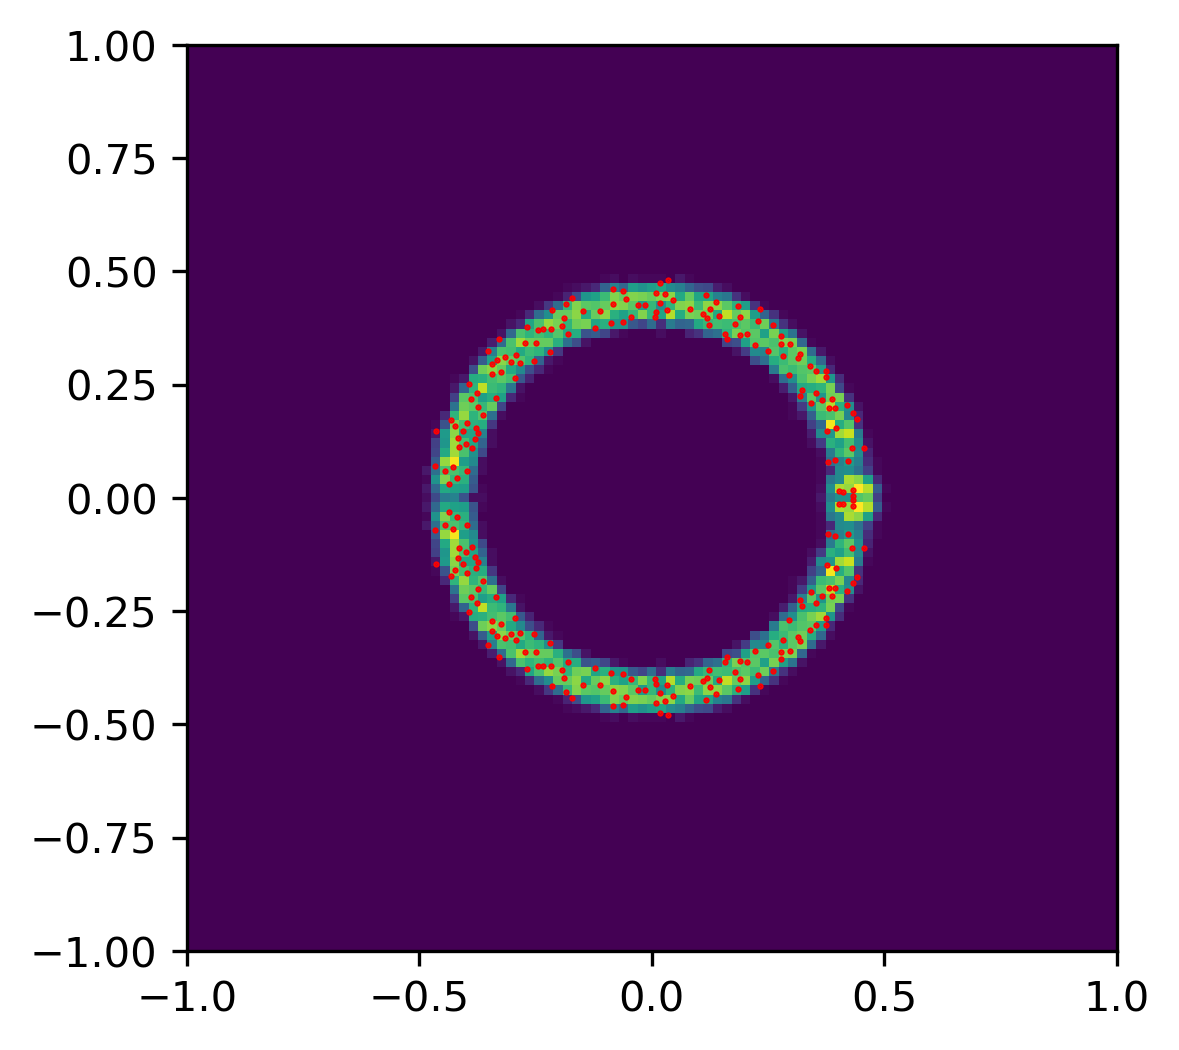

In [6]:
c = model_best.channel.c
rank = model_best.channel.kraus_part.rank
print(c, rank)
spectrum_list = []

for i in tqdm(range(100)):
    U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
    diluted = DilutedKrausMap(U=U, c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum1[:,0], spectrum1[:,1], "ro", markersize=0.5)
plt.show()

In [14]:
n = 4
d = 2**n

rank_grid = np.arange(50, 80, 10)

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
distance_best, model_best = optimize_annulus_distance(spectrum4, U, rank_grid)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.4088218666709118 None
0.20206418795355624 None
0.09334149227577132 None
0.06296902123073685 None
0.051251770728200106 None
0.058143917141411046 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.4085640250198402 None
0.2004326799249838 None
0.09128587614236457 None
0.05741106953133503 None
0.05358584535814646 None
0.05746447375656355 None


  0%|          | 0/500 [00:00<?, ?it/s]

0.4089498117197646 None
0.20067477505470266 None
0.08920279041892847 None
0.05240906016984666 None
0.051127647575668976 None
0.04717401130685926 None


tf.Tensor(0.09838013176878789, shape=(), dtype=float64) 70


  0%|          | 0/100 [00:00<?, ?it/s]

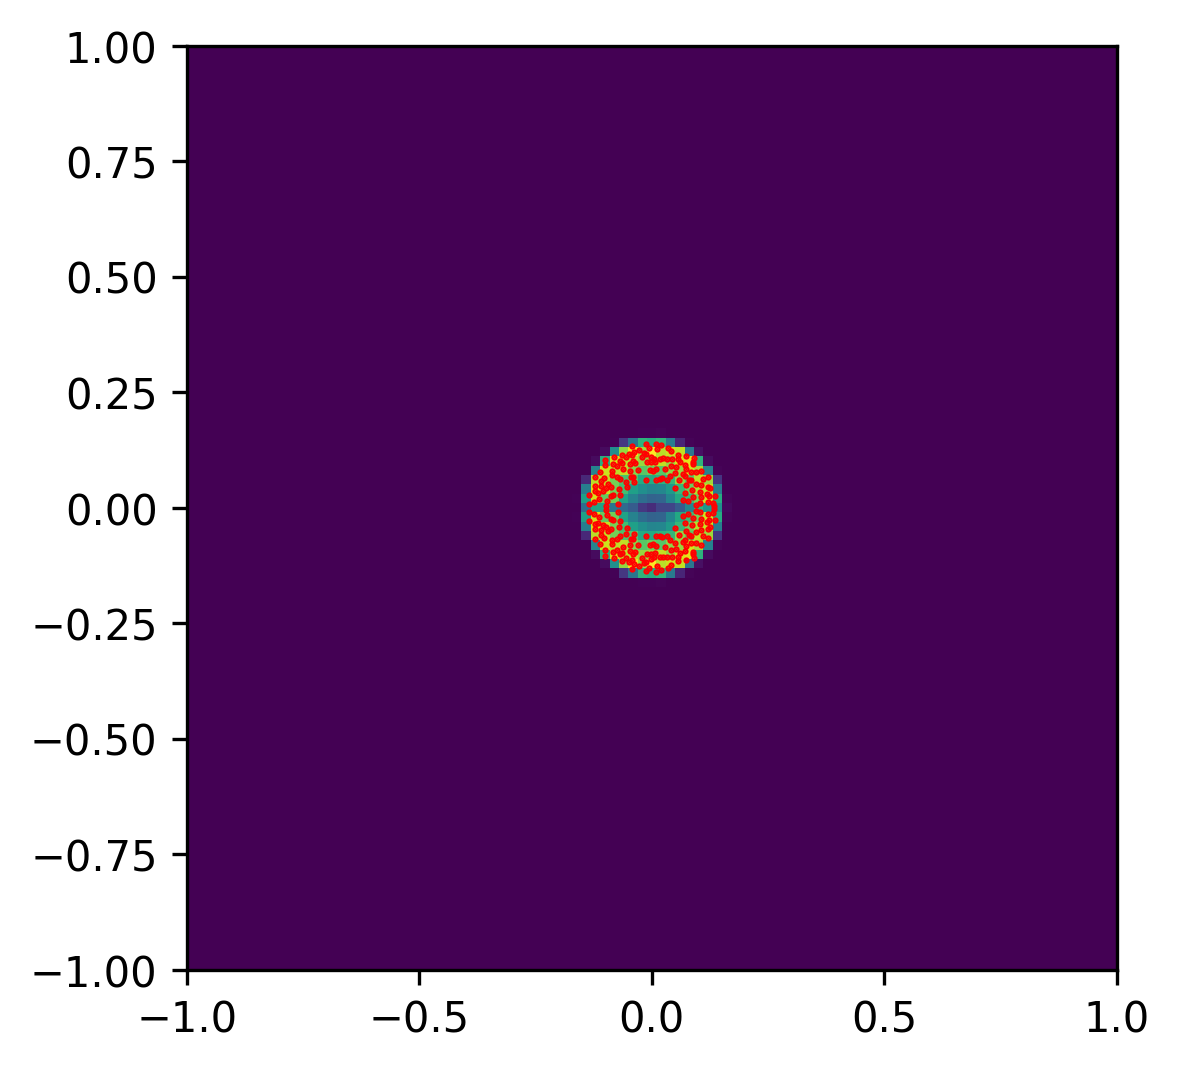

In [16]:
c = model_best.channel.c
rank = model_best.channel.kraus_part.rank
print(c, rank)

spectrum_list = []

for i in tqdm(range(100)):
    U = tf.cast(Operator(random_unitary(d).data), dtype=precision)
    diluted = DilutedKrausMap(U=U, c=c, kraus_part=KrausMap(d, rank=rank))
    spectrum = channel_spectrum(diluted, use_coords=True, keep_real=False)
    spectrum_list.append(spectrum)

spectrum = np.real(np.concatenate(spectrum_list))

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum[:,0], spectrum[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum4[:,0], spectrum4[:,1], "ro", markersize=0.5)
plt.show()